In [1]:
#Import packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
%matplotlib inline
import os
import re

Using TensorFlow backend.


In [2]:
#Reading json files

df = pd.read_json('C:/Projects/Sarcasm Detection/Sarcasm_Headlines_Dataset.json', lines=True)
df.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


In [54]:
df = df[['headline','is_sarcastic']]
df.shape

(26709, 2)

In [6]:
#class counts

df.is_sarcastic.value_counts()

0    14985
1    11724
Name: is_sarcastic, dtype: int64

In [7]:
#Preprocessing the headlines

df['headline'] = df['headline'].apply(lambda x: x.lower())
df['headline'] = df['headline'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))

In [14]:
for idx,row in df.iterrows():
    row[0] = row[0].replace('rt',' ')

In [86]:
#Using Tokenizer to vectorize and convert text into Sequences

max_fatures = 2000
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(df['headline'].values)
X = tokenizer.texts_to_sequences(df['headline'].values)
X = pad_sequences(X)

In [87]:
#Train test split

Y = pd.get_dummies(df['is_sarcastic']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.33, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(17895, 29) (17895, 2)
(8814, 29) (8814, 2)


In [94]:
#Architecture

embed_dim = 128
lstm_out = 196

model = Sequential()
model.add(Embedding(max_fatures, embed_dim,input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])

W0810 16:37:22.236706  7912 deprecation_wrapper.py:119] From C:\Users\jyoti.prakash\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0810 16:37:22.547184  7912 deprecation_wrapper.py:119] From C:\Users\jyoti.prakash\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0810 16:37:22.550147  7912 deprecation_wrapper.py:119] From C:\Users\jyoti.prakash\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0810 16:37:22.573086  7912 deprecation_wrapper.py:119] From C:\Users\jyoti.prakash\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:133: The name tf.placeholder_with_

In [98]:
#Training time

batch_size = 32
history = model.fit(X_train, Y_train, epochs = 25, batch_size=batch_size, verbose = 2)

W0810 16:39:23.991069  7912 deprecation.py:323] From C:\Users\jyoti.prakash\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/25
 - 27s - loss: 0.4471 - acc: 0.7831
Epoch 2/25
 - 25s - loss: 0.3364 - acc: 0.8552
Epoch 3/25
 - 31s - loss: 0.3012 - acc: 0.8724
Epoch 4/25
 - 31s - loss: 0.2754 - acc: 0.8836
Epoch 5/25
 - 30s - loss: 0.2571 - acc: 0.8911
Epoch 6/25
 - 30s - loss: 0.2377 - acc: 0.8992
Epoch 7/25
 - 29s - loss: 0.2179 - acc: 0.9127
Epoch 8/25
 - 28s - loss: 0.2071 - acc: 0.9156
Epoch 9/25
 - 28s - loss: 0.1883 - acc: 0.9219
Epoch 10/25
 - 27s - loss: 0.1768 - acc: 0.9278
Epoch 11/25
 - 28s - loss: 0.1626 - acc: 0.9353
Epoch 12/25
 - 29s - loss: 0.1460 - acc: 0.9431
Epoch 13/25
 - 27s - loss: 0.1319 - acc: 0.9474
Epoch 14/25
 - 26s - loss: 0.1275 - acc: 0.9497
Epoch 15/25
 - 25s - loss: 0.1130 - acc: 0.9561
Epoch 16/25
 - 27s - loss: 0.1025 - acc: 0.9597
Epoch 17/25
 - 26s - loss: 0.0950 - acc: 0.9615
Epoch 18/25
 - 25s - loss: 0.0903 - acc: 0.9650
Epoch 19/25
 - 25s - loss: 0.0839 - acc: 0.9667
Epoch 20/25
 - 25s - loss: 0.0752 - acc: 0.9707
Epoch 21/25
 - 25s - loss: 0.0722 - acc: 0.9726
E

In [99]:
validation_size = 1500

X_validate = X_test[-validation_size:]
Y_validate = Y_test[-validation_size:]
X_test = X_test[:-validation_size]
Y_test = Y_test[:-validation_size]
score,acc = model.evaluate(X_test, Y_test, verbose = 2, batch_size = batch_size)
print("score: %.2f" % (score))
print("acc: %.2f" % (acc))

score: 0.94
acc: 0.82


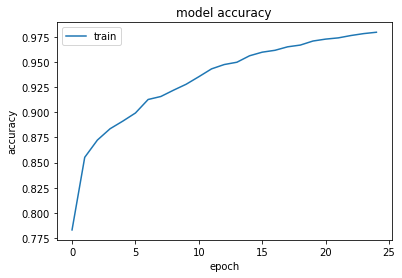

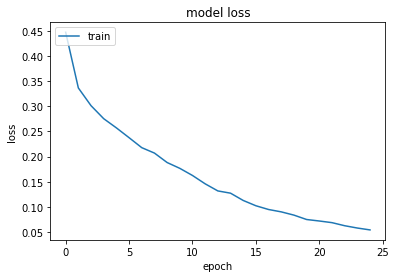

<Figure size 432x288 with 0 Axes>

In [100]:
# summarize history for accuracy
plt.plot(history.history['acc'])
#plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig('model_accuracy.png')
# summarize history for loss
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig('model_loss.png')

In [101]:
pos_cnt, neg_cnt, pos_correct, neg_correct = 0, 0, 0, 0
for x in range(len(X_validate)):
    
    result = model.predict(X_validate[x].reshape(1,X_test.shape[1]),batch_size=1,verbose = 2)[0]
   
    if np.argmax(result) == np.argmax(Y_validate[x]):
        if np.argmax(Y_validate[x]) == 0:
            neg_correct += 1
        else:
            pos_correct += 1
       
    if np.argmax(Y_validate[x]) == 0:
        neg_cnt += 1
    else:
        pos_cnt += 1



print("Sarcasm_acc", pos_correct/pos_cnt*100, "%")
print("Non-Sarcasm_acc", neg_correct/neg_cnt*100, "%")

Sarcasm_acc 78.28054298642535 %
Non-Sarcasm_acc 84.82676224611708 %


In [108]:
#Random example

headline = ['“It’s okay if you don’t like me. Not everyone has good taste.”']
headline = tokenizer.texts_to_sequences(headline)
headline = pad_sequences(headline, maxlen=29, dtype='int32', value=0)

sentiment = model.predict(headline,batch_size=1,verbose = 2)[0]
if(np.argmax(sentiment) == 0):
    print("This is Non-sarcastic")
elif (np.argmax(sentiment) == 1):
    print("This is a Sarcasm")

This is a Sarcasm


In [103]:
#Save the model
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")